In [83]:
import qiskit_nature
from rdkit import Chem
from pathlib import Path 

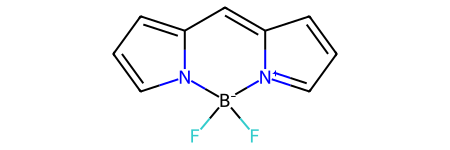

In [84]:
#smile='C1=CSC=N1'
smile = '[B-]1(n2cccc2C=C3[N+]1=CC=C3)(F)F'
smi_key='BODIPY'
mol_rdkit = Chem.MolFromSmiles(smile)
mol_rdkit

In [85]:
 import py3Dmol 

In [86]:

def view3D(mol, label, fmt='mol'):
        """3D vizualisation of mol/xyz file with Py3DMol
        """

        view = py3Dmol.view(width=400, height=400)       # visualiser la molécule avec une largeur de ''400'' et hauteur de ''400''

        if fmt=='mol':                                   # si le format des 'mol',
            view.addModel(Chem.MolToMolBlock(mol), fmt)     # generer les coordonnes de a molecule dans un block
            # view.addModel(mol, fmt)
        elif fmt=='xyz':                                      # sinon 
            view.addModel(mol, fmt)                             # generer les coordonnes en xyz

        view.setStyle({'stick': {}, 'sphere': {'scale': .30}})     # définir le style de représentation de la molécule, avec des bâtons pour les liaisons et des sphères pour les atomes avec une échelle de '30'
        view.addLabel(label, {'position': {'x': -2, 'y': -3, 'z': 0}}) # ajouter une etiquette de visualisation dont les coordonnées sont x,y,z

        view.zoomTo()
        view.show()

Meilleur conformere

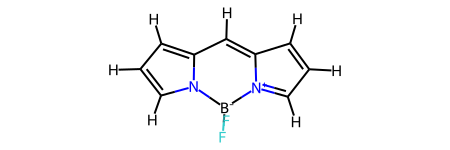

In [87]:
from rdkit.Chem import AllChem

# Add explicit Hs
mol_rdkit = Chem.AddHs(mol_rdkit)    #   Ajouter les atomes d'hydrogene a la molécule

# Generates the initial 3D conformation of the molecule
AllChem.EmbedMolecule(mol_rdkit)
mol_rdkit

Visualisatio 3D

In [88]:
# 3D visualization
mol_rdkit0 = mol_rdkit                    #crée une nouvelle variable mol_rdkit0 qui est une copie de mol_rdkit.
                                           #Cette copie est nécessaire pour la visualisation 3D, car la fonction view3D() modifie l'objet molécule passé en argument.

view3D(mol_rdkit0, f'{smi_key} RDKit Molecule')


3Dmol.js failed to load for some reason. Please check your browser console for error messages.

In [89]:
# Convert RDKit molecule to XYZ format 
mol_xyz0 = Chem.MolToXYZBlock(mol_rdkit)    # Convertir  la molecule format XYZ 
print(mol_xyz0)

21

B     -0.010545   -1.385684    0.429750
N     -1.256950   -0.532216    0.245820
C     -2.565515   -0.891689    0.440229
C     -3.391967    0.168833    0.165623
C     -2.551914    1.189282   -0.202909
C     -1.236070    0.746451   -0.150157
C      0.050710    1.375264   -0.426282
C      1.211730    0.765863   -0.312231
N      1.250523   -0.585010    0.102223
C      2.512279   -0.939051    0.131036
C      3.372796    0.160631   -0.263239
C      2.607276    1.197379   -0.534406
F      0.053675   -1.901112    1.808013
F     -0.097285   -2.559605   -0.455440
H     -2.913954   -1.872012    0.765052
H     -4.473912    0.137377    0.244339
H     -2.852149    2.167077   -0.485535
H      0.081291    2.422296   -0.751372
H      2.841589   -1.947714    0.421342
H      4.468880    0.101391   -0.314853
H      2.899510    2.182247   -0.857003



Preoptimisation avec rdkit

In [90]:
from rdkit.Chem import AllChem

# Optimizes the 3D conformation of the molecule using MMFF - Merck Molecular Force Field
AllChem.MMFFOptimizeMolecule(mol_rdkit, maxIters=200, mmffVariant="MMFF94s")   # utiliser 200 itérations et la variante MMFF94s

#Canonicalize the orientation of the conformation
Chem.rdMolTransforms.CanonicalizeMol(mol_rdkit, normalizeCovar=True, ignoreHs=False)

# 3D visualization
mol_rdkit1 = mol_rdkit
view3D(mol_rdkit1, f'{smi_key} RDKit Molecule MMFF94')


3Dmol.js failed to load for some reason. Please check your browser console for error messages.

In [91]:
# Convert RDKit molecule to XYZ format 
mol_xyz0 = Chem.MolToXYZBlock(mol_rdkit)    # Convertir  la molecule format XYZ 
print(mol_xyz0)

21

B     -0.057215   -1.449703    0.002024
N     -1.277367   -0.540311    0.001690
C     -2.600551   -0.898837    0.001975
C     -3.392979    0.221519    0.001518
C     -2.517009    1.277691    0.000941
C     -1.213486    0.796903    0.001056
C      0.096918    1.437444    0.000663
C      1.239719    0.784488    0.000886
N      1.233202   -0.629051    0.001548
C      2.485513   -1.016245    0.001637
C      3.384647    0.122526    0.001036
C      2.652472    1.217203    0.000574
F     -0.092734   -2.347444    1.169157
F     -0.099008   -2.310027   -1.192661
H     -2.982605   -1.919615    0.002521
H     -4.478082    0.203073    0.001622
H     -2.784977    2.304479    0.000492
H      0.162735    2.532233    0.000156
H      2.781575   -2.075712    0.002107
H      4.480869    0.045911    0.000987
H      2.978362    2.243474    0.000073



Supppression des deux premieres lignes 

In [92]:

# Remove the first two lines (number of atoms and empty line) from XYZ data
mol_xyz1 = '\n'.join(mol_xyz0.strip().split('\n')[2:])

# Check that the xyz file is valide for the next step (pyscf.gto)
print(mol_xyz1)

B     -0.057215   -1.449703    0.002024
N     -1.277367   -0.540311    0.001690
C     -2.600551   -0.898837    0.001975
C     -3.392979    0.221519    0.001518
C     -2.517009    1.277691    0.000941
C     -1.213486    0.796903    0.001056
C      0.096918    1.437444    0.000663
C      1.239719    0.784488    0.000886
N      1.233202   -0.629051    0.001548
C      2.485513   -1.016245    0.001637
C      3.384647    0.122526    0.001036
C      2.652472    1.217203    0.000574
F     -0.092734   -2.347444    1.169157
F     -0.099008   -2.310027   -1.192661
H     -2.982605   -1.919615    0.002521
H     -4.478082    0.203073    0.001622
H     -2.784977    2.304479    0.000492
H      0.162735    2.532233    0.000156
H      2.781575   -2.075712    0.002107
H      4.480869    0.045911    0.000987
H      2.978362    2.243474    0.000073


In [93]:
from qiskit_nature.second_q.drivers import PySCFDriver ,MethodType # Nous travaillons avec le driver PySCF

# Renseigner la structure de la molécule 
Thiazole_driver = PySCFDriver(
    atom=mol_xyz1, #Coordonnées xyz Thiazole
    basis='3-21G', #'def2-SVP', # Ensemble de base
    method = MethodType.RKS 
)
Thiazol = Thiazole_driver.run_pyscf() 
mol = Thiazole_driver._mol     
mf = Thiazole_driver._calc  

Affichage de quelques informations sur la molecule

In [94]:
print(f'Le nombre total d\'électrons est {mol.nelectron} \
et le nombre total d\'électrons (alpha, béta) est {mol.nelec}\n')
lumo_idx = mol.nelectron//2
homo_idx = mol.nelectron//2 -1 
print(f'Les index (0-Based) du (HOMO,LUMO) sont {homo_idx,lumo_idx}\n')
print(f'Le nombre d\'orbitales atomiques, dans la base {mol.basis}, est {mol.nao}\n')
print(f'L\'énergie nucléaire vaut {mol.energy_nuc()} Hartrees')

Le nombre total d'électrons est 98 et le nombre total d'électrons (alpha, béta) est (49, 49)

Les index (0-Based) du (HOMO,LUMO) sont (48, 49)

Le nombre d'orbitales atomiques, dans la base 3-21G, est 140

L'énergie nucléaire vaut 858.5967897939886 Hartrees


Tracé de la courbe des occupations moléculaires avec la fonction plotly.express

In [95]:
import plotly.express as px

# Plot the MO Occupations
fig = px.line(y=mf.mo_occ, markers=True, title="Molecular Orbital (MO) Occupations")
fig.update_layout(xaxis_title="Orbital Index (0-Based)", yaxis_title="MO Occupation")
fig.show()

Conversion des energies du homo et lumo en ev

In [96]:
from pyscf.data.nist import HARTREE2EV as au2ev 

print(f'Energie du Homo = {mf.mo_energy[homo_idx] * au2ev} eV')
print(f'Energie de Lumo = {mf.mo_energy[lumo_idx] * au2ev} eV')
print(f'Energie du gap Homo-Lumo = {abs(mf.mo_energy[homo_idx] - mf.mo_energy[lumo_idx]) * au2ev} eV')

Energie du Homo = -5.7088744144082435 eV
Energie de Lumo = -3.673142047777769 eV
Energie du gap Homo-Lumo = 2.035732366630474 eV


Tracé de la courbe des energies des MO

In [97]:
# Plot the MO Energies (i.e. eigenvalues of the Fock matrix)
fig = px.line(y=mf.mo_energy, markers=True, title="Molecular Orbital (MO) Energies (a.u.)")
fig.update_layout(xaxis_title="Orbital Index (0-Based)", yaxis_title="MO Energies (a.u.)")
fig.show()

In [98]:
mf.dump_scf_summary()

**** SCF Summaries ****
Total Energy =                        -672.129088478872063
Nuclear Repulsion Energy =             858.596789793988592
One-electron Energy =                -2629.742348106312875
Two-electron Coulomb Energy =         1183.526037830823043
DFT Exchange-Correlation Energy =      -84.509567997370866


Construction du hamiltonien 

In [107]:
from qiskit_nature.second_q.formats.qcschema import QCSchema
from qiskit_nature.second_q.formats import qcschema_translator

qcschema = Thiazole_driver.to_qcschema(include_dipole=True)
hamiltonian = qcschema_translator._get_mo_hamiltonian_direct(qcschema)

Construction du hamiltonien fermionique

In [18]:
#print(hamiltonian.second_q_op())

In [19]:
# print(Thiazole_driver.run().hamiltonian)
# print(hamiltonian)


## Reduction d'un espace actif (AS)

In [100]:
# definir l'espace actif
import numpy as np
from qiskit_nature.second_q.transformers import ActiveSpaceTransformer
transformer = ActiveSpaceTransformer(2, 2)  

In [101]:
# quelques variables utiles
total_number_particle = mol.nelec
total_num_electrons = mol.nelectron
total_num_spatial_orbitals = mol.nao
num_alpha = qcschema.properties.calcinfo_nalpha
num_beta = qcschema.properties.calcinfo_nbeta

occupation_alpha = np.asarray([1.0] * num_alpha 
                              + [0.0] * (total_num_spatial_orbitals - num_alpha)
                              )
occupation_beta = np.asarray([1.0] * num_beta 
                             + [0.0] * (total_num_spatial_orbitals - num_beta)
                             )

In [102]:
## prepare active space
transformer.prepare_active_space(total_num_electrons,
        total_num_spatial_orbitals,
        occupation_alpha = occupation_alpha,
        occupation_beta = occupation_beta)

In [103]:
# Determine active space
as_orbitals = transformer._determine_active_space(total_num_electrons, total_num_spatial_orbitals)
as_orbitals[0]


[48, 49]

In [104]:
# Reduice hamiltonian
reduced_hamiltonian = transformer.transform_hamiltonian(hamiltonian)

In [106]:
print(reduced_hamiltonian.second_q_op())

Fermionic Operator
number spin orbitals=4, number terms=72
  0.12541156427869712 * ( +_0 +_0 -_0 -_0 )
+ 0.015088049210239225 * ( +_0 +_0 -_1 -_0 )
+ 0.015088049210239225 * ( +_0 +_1 -_0 -_0 )
+ 0.10531456082563456 * ( +_0 +_1 -_1 -_0 )
+ 0.12541156427869712 * ( +_0 +_2 -_2 -_0 )
+ 0.015088049210239225 * ( +_0 +_2 -_3 -_0 )
+ 0.015088049210239225 * ( +_0 +_3 -_2 -_0 )
+ 0.10531456082563456 * ( +_0 +_3 -_3 -_0 )
+ 0.015088049210239225 * ( +_0 +_0 -_0 -_1 )
+ 0.02658665970734114 * ( +_0 +_0 -_1 -_1 )
+ 0.02658665970734114 * ( +_0 +_1 -_0 -_1 )
+ -0.008632770517122468 * ( +_0 +_1 -_1 -_1 )
+ 0.015088049210239225 * ( +_0 +_2 -_2 -_1 )
+ 0.02658665970734114 * ( +_0 +_2 -_3 -_1 )
+ 0.02658665970734114 * ( +_0 +_3 -_2 -_1 )
+ -0.008632770517122468 * ( +_0 +_3 -_3 -_1 )
+ 0.015088049210239225 * ( +_1 +_0 -_0 -_0 )
+ 0.02658665970734114 * ( +_1 +_0 -_1 -_0 )
+ 0.02658665970734114 * ( +_1 +_1 -_0 -_0 )
+ -0.008632770517122468 * ( +_1 +_1 -_1 -_0 )
+ 0.015088049210239225 * ( +_1 +_2 -_2 -_0 )
+ 0

In [108]:
## Total dipole moment 
dipole_x = qcschema_translator._get_mo_dipole(qcschema, "x")
dipole_y = qcschema_translator._get_mo_dipole(qcschema, "y")
dipole_z = qcschema_translator._get_mo_dipole(qcschema, "z")

In [119]:
from qiskit_nature.second_q.properties import (
    AngularMomentum,
    ElectronicDensity,
    ElectronicDipoleMoment,
    Magnetization,
    ParticleNumber,
)

In [110]:
dipole_moment = ElectronicDipoleMoment(dipole_x,dipole_y,dipole_z)
if qcschema.properties.nuclear_dipole_moment is not None:
    dipole_moment.nuclear_dipole_moment = qcschema.properties.nuclear_dipole_moment

In [29]:
transform_electronic_dipole_moment(  # pylint: disable=invalid-name
    dipole_moment,
   # density_total: ElectronicIntegrals,
    #density_active: ElectronicIntegrals,
    #active_basis: BasisTransformer,
    #offset_name: str,
)

NameError: name 'transform_electronic_dipole_moment' is not defined

In [132]:
from qiskit_nature.second_q.hamiltonians import ElectronicEnergy
from typing import cast
electronic_energy = cast(ElectronicEnergy, reduced_hamiltonian)
new_problem = ElectronicStructureProblem(electronic_energy)

In [137]:
for prop in problem.properties:
    if isinstance(prop, ElectronicDipoleMoment):
        new_problem.properties.electronic_dipole_moment = (
            _transform_electronic_dipole_moment(
                prop,
                transformer._density_total,
                transformer._active_density,
                transformer._active_basis,
                transformer.__class__.__name__,
        ) 
       ) 
    elif isinstance(prop, ElectronicDensity):
        transformed = transformer._active_basis.transform_electronic_integrals(prop)
        new_problem.properties.electronic_density = ElectronicDensity(
            transformed.alpha, transformed.beta, transformed.beta_alpha
       )
    elif isinstance(prop, AngularMomentum):
        if prop.overlap is None:
            #new_problem.properties.add(prop.__class__(new_problem.num_spatial_orbitals))
            continue       

        if isinstance(transformer._active_basis.coefficients, ElectronicIntegrals):
            coeff_alpha = transformer._active_basis.coefficients.alpha["+-"]
            coeff_beta: Tensor
            if transformer._active_basis.coefficients.beta.is_empty():
                coeff_beta = coeff_alpha
            else:
                coeff_beta = transformer._active_basis.coefficients.beta["+-"]

            new_problem.properties.angular_momentum = AngularMomentum(
                new_problem.num_spatial_orbitals,
                coeff_alpha.transpose() @ prop.overlap @ coeff_beta,
            )
        elif isinstance(prop, (Magnetization, ParticleNumber)):
            new_problem.properties.add(prop.__class__(new_problem.num_spatial_orbitals))
        else:
            LOGGER.warning("Encountered an unsupported property of type '%s'.", type(prop))


In [153]:
Setup Problem Electronic properties
'''
from qiskit_nature.second_q.properties import (
    AngularMomentum,
    ElectronicDensity,
    Magnetization,
    ParticleNumber,
    ElectronicDipoleMoment
)
from qiskit_nature.second_q.operators import Tensor

for prop in problem.properties:
    if isinstance(prop, (Magnetization, ParticleNumber)):
        problem.properties.add(prop.class(problem.num_spatial_orbitals))
    
    elif isinstance(prop, ElectronicDipoleMoment):
        problem.properties.electronic_dipole_moment = (
            _transform_electronic_dipole_moment(
                prop,
                transformer._density_total,
                transformer._active_density,
                transformer._active_basis,
                transformer.class.name,
            )
        )

    elif isinstance(prop, ElectronicDensity):
        transformed = transformer._active_basis.transform_electronic_integrals(prop)
        problem.properties.electronic_density = ElectronicDensity(
            transformed.alpha, transformed.beta, transformed.beta_alpha
        )

    elif isinstance(prop, AngularMomentum):
        if prop.overlap is None:
            # only the size needs to be changed
            problem.properties.add(prop.class(problem.num_spatial_orbitals))
            continue

        if isinstance(transformer._active_basis.coefficients, ElectronicIntegrals):
            coeff_alpha = transformer._active_basis.coefficients.alpha["+-"]
            coeff_beta: Tensor
            if transformer._active_basis.coefficients.beta.is_empty():
                coeff_beta = coeff_alpha
            else:
                coeff_beta = transformer._active_basis.coefficients.beta["+-"]

            problem.properties.angular_momentum = AngularMomentum(
                problem.num_spatial_orbitals,
                coeff_alpha.transpose() @ prop.overlap @ coeff_beta,
            )

norb = problem.num_spatial_orbitals
problem.properties.particle_number = ParticleNumber(norb)
problem.properties.magnetization = Magnetization(norb)
problem.properties.angular_momentum = AngularMomentum(norb)
problem.properties.electronic_density = ElectronicDensity.from_orbital_occupation(
    problem.orbital_occupations, 
    problem.orbital_occupations_b
)

SyntaxError: unterminated triple-quoted string literal (detected at line 59) (100224186.py, line 2)

In [141]:
#Construction d'un nouveau probleme
#from qiskit_nature.second_q.problems import ElectronicBasis, ElectronicStructureProblem
#problem = ElectronicStructureProblem(reduced_hamiltonian)
num_particles = problem.num_particles
norb = problem.num_spatial_orbitals 
problem.reference_energy = qcschema.properties.return_energy
#problem.properties.angular_momentum = AngularMomentum(norb)
#problem.properties.magnetization = Magnetization(norb)
#problem.properties.particle_number = ParticleNumber(norb)


In [142]:
if qcschema.wavefunction.scf_eigenvalues_a is not None:
    problem.orbital_energies = np.asarray(qcschema.wavefunction.scf_eigenvalues_a)     #140-143 qcshema_tranlator
ora = problem.orbital_energies

if qcschema.wavefunction.scf_eigenvalues_b is not None:
    problem.orbital_energies_b = np.asarray(qcschema.wavefunction.scf_eigenvalues_b)
orb = problem.orbital_energies_b

In [143]:
#print(ora)
#print(orb)

None


In [144]:
from qiskit_nature.second_q.mappers import JordanWignerMapper,ParityMapper
from qiskit_nature.second_q.operators import FermionicOp

In [145]:
Thiazole_qubit_P_op = ParityMapper().map(reduced_hamiltonian.second_q_op())

print("Number of items in the PT Pauli list:", len(Thiazole_qubit_P_op),'\n')

# if len(Thiazole_qubit_P_op) <= 10:
print(Thiazole_qubit_P_op)
# else:
#     print(Thiazole_qubit_P_op[0:10])


Number of items in the PT Pauli list: 27 

SparsePauliOp(['IIII', 'IIIZ', 'IIZZ', 'IIZI', 'IZZI', 'IZZZ', 'ZXZI', 'ZXZZ', 'IXII', 'IXIZ', 'ZZII', 'ZZIZ', 'IIZX', 'IZIX', 'IIIX', 'IZZX', 'ZXIX', 'IXZX', 'ZXZX', 'IXIX', 'ZZZX', 'ZZIX', 'IZIZ', 'ZXIZ', 'IXZZ', 'ZZZZ', 'ZIZI'],
              coeffs=[-0.5705781 +0.j,  0.10960266+0.j,  0.02186159+0.j,  0.03936395+0.j,
  0.10960266+0.j,  0.06270578+0.j,  0.01785983+0.j,  0.00754402+0.j,
 -0.01785983+0.j, -0.00754402+0.j,  0.02186159+0.j,  0.05265728+0.j,
  0.01785983+0.j,  0.00754402+0.j, -0.01785983+0.j, -0.00754402+0.j,
  0.01329333+0.j, -0.01329333+0.j, -0.01329333+0.j,  0.01329333+0.j,
 -0.00431639+0.j,  0.00431639+0.j,  0.05265728+0.j, -0.00431639+0.j,
  0.00431639+0.j,  0.06090136+0.j,  0.03936395+0.j])


In [146]:
num_qubits = Thiazole_qubit_P_op.num_qubits
last_idx = num_qubits - 1
mid_idx = num_qubits // 2 - 1
sq_list = [mid_idx, last_idx]
sq_list


[1, 3]

In [147]:
symmetries, sq_paulis = [], []
for idx in sq_list:
    pauli_str = ["I"] * num_qubits
pauli_str

['I', 'I', 'I', 'I']

In [148]:
pauli_str[idx] = "Z"
z_sym = "".join(pauli_str)[::-1]
symmetries.append(z_sym)

In [149]:
pauli_str[idx] = "X"
sq_pauli = "".join(pauli_str)[::-1]
sq_paulis.append(sq_pauli)